In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')


In [3]:
# get experiment temperature information
fridge = np.genfromtxt(fname='fridgeData2.txt', delimiter = ',', names=["Index", "APDS Light Sensor", "ADC Bare Thermistor", "R Bare Thermistor", "Bare Thermistor", "HS Thermometer", "LPS Thermometer", "uP Thermometer"])

In [4]:
# just take a looksiedaisy there
print(fridge[0:20])

[( 0.,   96., 2233., 39.7 , 18.73, 21.  , 20.22, 22.25)
 ( 1.,  129., 2289., 41.95, 17.52, 21.1 , 20.62, 22.25)
 ( 2.,   65., 2252., 40.45, 18.32, 21.14, 20.7 , 22.25)
 ( 3.,  110., 2390., 46.4 , 15.34, 21.21, 20.74, 22.75)
 ( 4.,  133., 2371., 45.52, 15.75, 21.24, 20.78, 22.75)
 ( 5.,  250., 2393., 46.54, 15.27, 21.28, 20.81, 22.5 )
 ( 6.,  102., 2399., 46.82, 15.14, 21.32, 20.87, 22.75)
 ( 7.,  105., 2155., 36.77, 20.42, 21.37, 20.91, 22.75)
 ( 8.,  365., 2099., 34.81, 21.64, 21.4 , 20.94, 22.75)
 ( 9.,   38., 2068., 33.77, 22.32, 21.42, 20.98, 22.75)
 (10.,  205., 2042., 32.92, 22.89, 21.43, 20.99, 22.75)
 (11.,   52., 2036., 32.73, 23.03, 21.43, 21.  , 22.75)
 (12.,   55., 2023., 32.32, 23.31, 21.43, 21.01, 23.  )
 (13.,   52., 2013., 32.  , 23.53, 21.44, 21.02, 22.75)
 (14.,   39., 2023., 32.32, 23.31, 21.44, 21.02, 22.75)
 (15.,  727., 2026., 32.41, 23.25, 21.46, 21.03, 22.75)
 (16., 1359., 2029., 32.51, 23.18, 21.47, 21.04, 22.75)
 (17., 1338., 2038., 32.79, 22.98, 21.53, 21.08,

In [5]:
# take and label things
index = fridge["Index"]
light = fridge["APDS_Light_Sensor"]
baretemp = fridge["Bare_Thermistor"]
HStemp = fridge["HS_Thermometer"]
LPStemp = fridge["LPS_Thermometer"]
uPtemp = fridge["uP_Thermometer"]

In [7]:
# CHANGE HERE HOW LONG EXPERIMENT LASTED
exp_minutes = 120
exp_secs = exp_minutes*60
# multiplying factor for converting index to time
dt = exp_secs / index.size
print(dt)

8.571428571428571


In [8]:
# for approximating: 
# iterate thru each thermometer, look for the first time (Tenv-Ti) < 0.368 * (Tenv-T0)
# report that index and break from the loop
# then we plot them all over top
lowlightind, lowlight = index[light < 5], light < 5
print(lowlightind[0])
print(lowlightind[-1])
cold_st = int(lowlightind[0])
cold_end = int(lowlightind[-1])
coldind = np.arange(cold_st, cold_end+1)
warmind = np.arange(cold_end, index.size)
# warm end is implied by end of experiment

20.0
465.0


In [9]:
# Coldifying temp curve
coldbaretemp = baretemp[cold_st:cold_end+1]
coldHStemp = HStemp[cold_st:cold_end+1]
coldLPStemp = LPStemp[cold_st:cold_end+1]
colduPtemp = uPtemp[cold_st:cold_end+1]

# Warmifying temp curve
warmbaretemp = baretemp[cold_end:]
warmHStemp = HStemp[cold_end:]
warmLPStemp = LPStemp[cold_end:]
warmuPtemp = uPtemp[cold_end:]

In [10]:
# Set up the chosen bare temperatures
stwarmbaretemp = coldbaretemp[0]
eqcoldbaretemp = coldbaretemp[-1]
endwarmbaretemp = warmbaretemp[-1]
stwarmHStemp = coldHStemp[0]
eqcoldHStemp = coldHStemp[-1]
endwarmHStemp = warmHStemp[-1]
stwarmLPStemp = coldLPStemp[0]
eqcoldLPStemp = coldLPStemp[-1]
endwarmLPStemp = warmLPStemp[-1]
stwarmuPtemp = colduPtemp[0]
eqcolduPtemp = colduPtemp[-1]
endwarmuPtemp = warmuPtemp[-1]


In [11]:
# find the change in index by time constant
dindtaucoldbaretemp = coldind[(coldbaretemp < (0.37 * (stwarmbaretemp - eqcoldbaretemp) + eqcoldbaretemp))][0] - cold_st
dindtaucoldHStemp = coldind[(coldHStemp < (0.37 * (stwarmHStemp - eqcoldHStemp) + eqcoldHStemp))][0] - cold_st
dindtaucoldLPStemp = coldind[(coldLPStemp < (0.37 * (stwarmLPStemp - eqcoldLPStemp) + eqcoldLPStemp))][0] - cold_st
dindtaucolduPtemp = coldind[(colduPtemp < (0.37 * (stwarmuPtemp - eqcolduPtemp) + eqcolduPtemp))][0] - cold_st

print("Approximate time constants for cooling:")
print(f"Bare Thermistor: {dindtaucoldbaretemp * dt}s")
print(f"HS Thermometer: {dindtaucoldHStemp * dt}s")
print(f"LPS Thermometer: {dindtaucoldLPStemp * dt}s")
print(f"uP Thermometer: {dindtaucolduPtemp * dt}s")

# find the change in index by time constant
dindtauwarmbaretemp = warmind[(warmbaretemp < (0.37 * (eqcoldbaretemp - endwarmbaretemp) + endwarmbaretemp))][0] - cold_end
dindtauwarmHStemp = warmind[(warmHStemp < (0.37 * (eqcoldHStemp - endwarmHStemp) + endwarmHStemp))][0] - cold_end
dindtauwarmLPStemp = warmind[(warmLPStemp < (0.37 * (eqcoldLPStemp - endwarmLPStemp) + endwarmLPStemp))][0] - cold_end
dindtauwarmuPtemp = warmind[(warmuPtemp < (0.37 * (eqcolduPtemp - endwarmuPtemp) + endwarmuPtemp))][0] - cold_end

print("Approximate time constants for warming:")
print(f"Bare Thermistor: {dindtaucoldbaretemp * dt}s")
print(f"HS Thermometer: {dindtaucoldHStemp * dt}s")
print(f"LPS Thermometer: {dindtaucoldLPStemp * dt}s")
print(f"uP Thermometer: {dindtaucolduPtemp * dt}s")

# bare thermistor heated up :(

Approximate time constants for cooling:
Bare Thermistor: 0.0s
HS Thermometer: 702.8571428571429s
LPS Thermometer: 677.1428571428571s
uP Thermometer: 754.2857142857142s
Approximate time constants for warming:
Bare Thermistor: 0.0s
HS Thermometer: 702.8571428571429s
LPS Thermometer: 677.1428571428571s
uP Thermometer: 754.2857142857142s


Text(0.5, 1.0, 'Instrument Temperature for Cold Experiment over time')

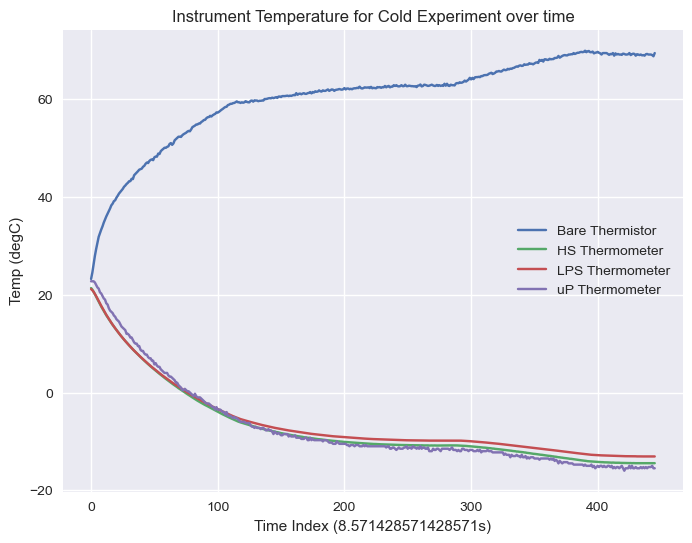

In [12]:
fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.plot(coldbaretemp, label='Bare Thermistor')
ax.plot(coldHStemp, label='HS Thermometer')
ax.plot(coldLPStemp, label='LPS Thermometer')
ax.plot(colduPtemp, label='uP Thermometer')
ax.legend(loc='best')
ax.set_xlabel(f"Time Index ({dt}s)")
ax.set_ylabel("Temp (degC)")
ax.set_title("Instrument Temperature for Cold Experiment over time")

In [43]:
# bare thermistor correction element in case lucille fucked up and didnt input the right data
# PLUS in case it does something weird for some reason
coldbarest = coldbaretemp[:100].argmax() + cold_st
dindtaucoldbaretempnew = coldind[coldbarest:][(coldbaretemp[coldbarest:] < (0.37 * (stwarmbaretemp - eqcoldbaretemp) + eqcoldbaretemp))][0] - coldbarest
print("Approximate time constant:")
print(f"Bare Thermistor: {dindtaucoldbaretempnew * dt}s")

Approximate time constant:
Bare Thermistor: 441.11547525530244s


In [ ]:
# T(t)=(T_s-T_e)e^{-t/\tau}+T_e
# (T(t) - T_e)/(T_s-T_e) = e^-t*tau
# ln((T(t)-T_e)/(T_s-T_e)) = -t*tau
# t(ln(T(t)-T_e)-ln(T_s-T_e))=tau
# find time constant here by plotting stuff against t
y = baretemp[coldbarest:cold_end+1] - eqcoldbaretemp
t = (coldind[coldbarest - cold_st:] * dt)
print(t.size)
print(y.size)
coefs = np.polyfit(t, y, deg=1)
print(-1/coefs[0])

634
634
894.8921311003585


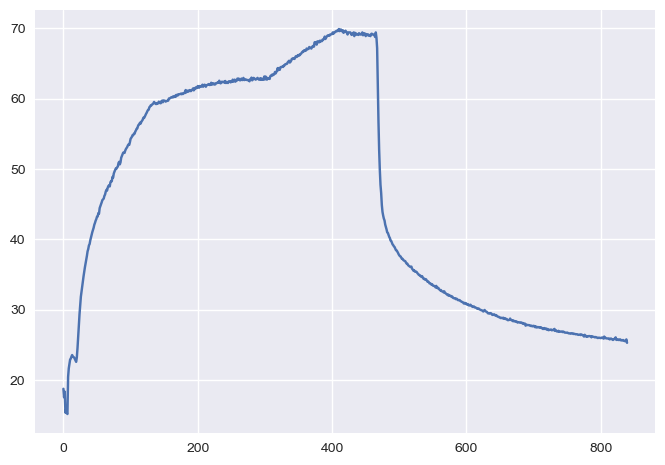

In [ ]:
plt.plot(baretemp)
